<a href="https://colab.research.google.com/github/limedosa/Bat-Population-Decline/blob/main/Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install -U scikit-learn

In [ ]:
from google.colab import drive

In [ ]:
df = pd.read_csv('/content/one_hot_model_data_without_county_and_state.csv')

# New Section

In [ ]:
df.head()

,Unnamed: 0,Sample Collection Date,Resistant,Susceptible,Tolerant,unassigned,CFU,Ascomycota,Basidiomycota,Mortierellomycota,...,Torulaspora,Tremella,Trichoderma,Trichomonascus,Trichosporon,Verticillium,Vishniacozyma,Wardomyces,Yamadazyma,pd_present_in_pop
0,0,2014-02-11,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2014-02-11,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2014-02-11,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,2014-02-11,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2014-02-11,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['Sample Collection Date'] = pd.to_datetime(df['Sample Collection Date'])

df.head()

,Unnamed: 0,Sample Collection Date,Resistant,Susceptible,Tolerant,unassigned,CFU,Ascomycota,Basidiomycota,Mortierellomycota,...,Torulaspora,Tremella,Trichoderma,Trichomonascus,Trichosporon,Verticillium,Vishniacozyma,Wardomyces,Yamadazyma,pd_present_in_pop
0,0,2014-02-11,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2014-02-11,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2014-02-11,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,2014-02-11,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2014-02-11,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(df['CFU'].values)

['6' '1' '6' '1' '3' '1' '1' '1' '3' '3' '6' '6' '1' '7' '1' '24' '5' '1'
 '2' '6' '1' '1' '4' '15' '1' '5' '1' '3' '50' '1' '7' '4' '1' '3' '1' '4'
 '1' '2' '2' '3' '1' '5' '50' '5' '1' '2' '2' '7' '2' '1' '1' '2' '1' '8'
 '49' '3' '4' '1' '3' '1' '1' '3' '3' '1' '1' '2' '16' '1' '52' '3' '2'
 '7' '3' '1' '3' '1' '1' '1' '3' '1' '15' '2' '1' '2' '3' '1' '4' '6' '1'
 '4' '4' '3' '5' '1' '8' '1' '200' '3' '1' '3' '1' '1' '100' '1' '100'
 '10' '25' '100' '10' '1' '12' '50' '42' '1' '100' '41' '100' '28' '33'
 '100' '100' '73' '2' '7' '1' '5' '1' '15' '2' '400' '30' '6' '1' '36' '1'
 '100' '4' '1' '100' '3' '200' '100' '5' '1' '100' '100' '1' '1' '12' '11'
 '42' '52' '1' '3' '100' '1' '4' '2' '1' '1' '300' '1' '20' '9' '1' '12'
 '100' '1' '2' '8' '1' '8' '300' '2' '1' '100' '1' '50' '1' '2' '37' '6'
 '1' '20' '50' '10' '30' '1' '2' '1' '5' '5' '1' '53' '50' '1' '1' '5'
 '300' '100' '100' '6' '56' '13' '1' '1' '12' '6' '50' '53' '24' '1' '100'
 '1' '8' '11' '100' '1' '100' '100' '3' '50' '

In [ ]:
df['CFU'] = pd.to_numeric(df['CFU'], errors='coerce')
df['CFU'] = df['CFU'].fillna(0)

print(df['CFU'].values)

[  6.   1.   6.   1.   3.   1.   1.   1.   3.   3.   6.   6.   1.   7.
   1.  24.   5.   1.   2.   6.   1.   1.   4.  15.   1.   5.   1.   3.
  50.   1.   7.   4.   1.   3.   1.   4.   1.   2.   2.   3.   1.   5.
  50.   5.   1.   2.   2.   7.   2.   1.   1.   2.   1.   8.  49.   3.
   4.   1.   3.   1.   1.   3.   3.   1.   1.   2.  16.   1.  52.   3.
   2.   7.   3.   1.   3.   1.   1.   1.   3.   1.  15.   2.   1.   2.
   3.   1.   4.   6.   1.   4.   4.   3.   5.   1.   8.   1. 200.   3.
   1.   3.   1.   1. 100.   1. 100.  10.  25. 100.  10.   1.  12.  50.
  42.   1. 100.  41. 100.  28.  33. 100. 100.  73.   2.   7.   1.   5.
   1.  15.   2. 400.  30.   6.   1.  36.   1. 100.   4.   1. 100.   3.
 200. 100.   5.   1. 100. 100.   1.   1.  12.  11.  42.  52.   1.   3.
 100.   1.   4.   2.   1.   1. 300.   1.  20.   9.   1.  12. 100.   1.
   2.   8.   1.   8. 300.   2.   1. 100.   1.  50.   1.   2.  37.   6.
   1.  20.  50.  10.  30.   1.   2.   1.   5.   5.   1.  53.  50.   1.
   1. 

In [ ]:
df['CFU'] = df['CFU'].astype(int)


In [ ]:
def to_pd_datetime(dt_time):
    dt_time = pd.to_datetime(dt_time)
    return 10000 * dt_time.year + 100 * dt_time.month + dt_time.day

new_datetime = []

for value in df['Sample Collection Date'].values:
  # print(type(to_pd_datetime(value)))
  new_datetime.append(to_pd_datetime(value))


df['Sample Collection Date'] = new_datetime

df.head()

# print(type(df['Sample Collection Date']))


,Unnamed: 0,Sample Collection Date,Resistant,Susceptible,Tolerant,unassigned,CFU,Ascomycota,Basidiomycota,Mortierellomycota,...,Torulaspora,Tremella,Trichoderma,Trichomonascus,Trichosporon,Verticillium,Vishniacozyma,Wardomyces,Yamadazyma,pd_present_in_pop
0,0,20140211,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,20140211,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,20140211,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,20140211,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,20140211,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# testing different feature combinations

# df = df.drop('Sample Collection Date', axis = 1)
# df = df.drop('Resistant', axis = 1)
# df = df.drop('Unnamed: 0', axis = 1)

df.head()

,Unnamed: 0,Sample Collection Date,Resistant,Susceptible,Tolerant,unassigned,CFU,Ascomycota,Basidiomycota,Mortierellomycota,...,Torulaspora,Tremella,Trichoderma,Trichomonascus,Trichosporon,Verticillium,Vishniacozyma,Wardomyces,Yamadazyma,pd_present_in_pop
0,0,20140211,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,20140211,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,20140211,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,20140211,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,20140211,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = df['pd_present_in_pop']
X = df.drop(columns = 'pd_present_in_pop', axis = 1)

X.head()

,Unnamed: 0,Sample Collection Date,Resistant,Susceptible,Tolerant,unassigned,CFU,Ascomycota,Basidiomycota,Mortierellomycota,...,Talaromyces,Torulaspora,Tremella,Trichoderma,Trichomonascus,Trichosporon,Verticillium,Vishniacozyma,Wardomyces,Yamadazyma
0,0,20140211,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20140211,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,20140211,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,20140211,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,20140211,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1234)

In [ ]:
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

In [ ]:
print(X_train.dtypes)

Unnamed: 0                int64
Sample Collection Date    int64
Resistant                 int64
Susceptible               int64
Tolerant                  int64
                          ...  
Trichosporon              int64
Verticillium              int64
Vishniacozyma             int64
Wardomyces                int64
Yamadazyma                int64
Length: 259, dtype: object


In [ ]:
print('Begin RF Implementation...')

# Create the  RandomForestRegressor model object below and assign to variable 'rf_model'
rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)


# Fit the model to the training data below


rf_model.fit(X_train, y_train)

# Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_rf_pred'

print(X_test)

y_rf_pred = rf_model.predict(X_test)


rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
rf_r2 = r2_score(y_test, y_rf_pred)

print('End')

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


Begin RF Implementation...
     Unnamed: 0  Sample Collection Date  Resistant  Susceptible  Tolerant  \
444         444                20150218          0            0         1   
146         146                20140304          0            0         1   
122         122                20140304          0            1         0   
226         226                20140319          0            0         0   
322         322                20150115          0            0         0   
..          ...                     ...        ...          ...       ...   
153         153                20140304          0            0         1   
830         830                20160112          0            0         0   
412         412                20150218          0            0         1   
221         221                20140319          0            0         0   
654         654                20170315          1            0         0   

     unassigned  CFU  Ascomycota  Basidiomycota 

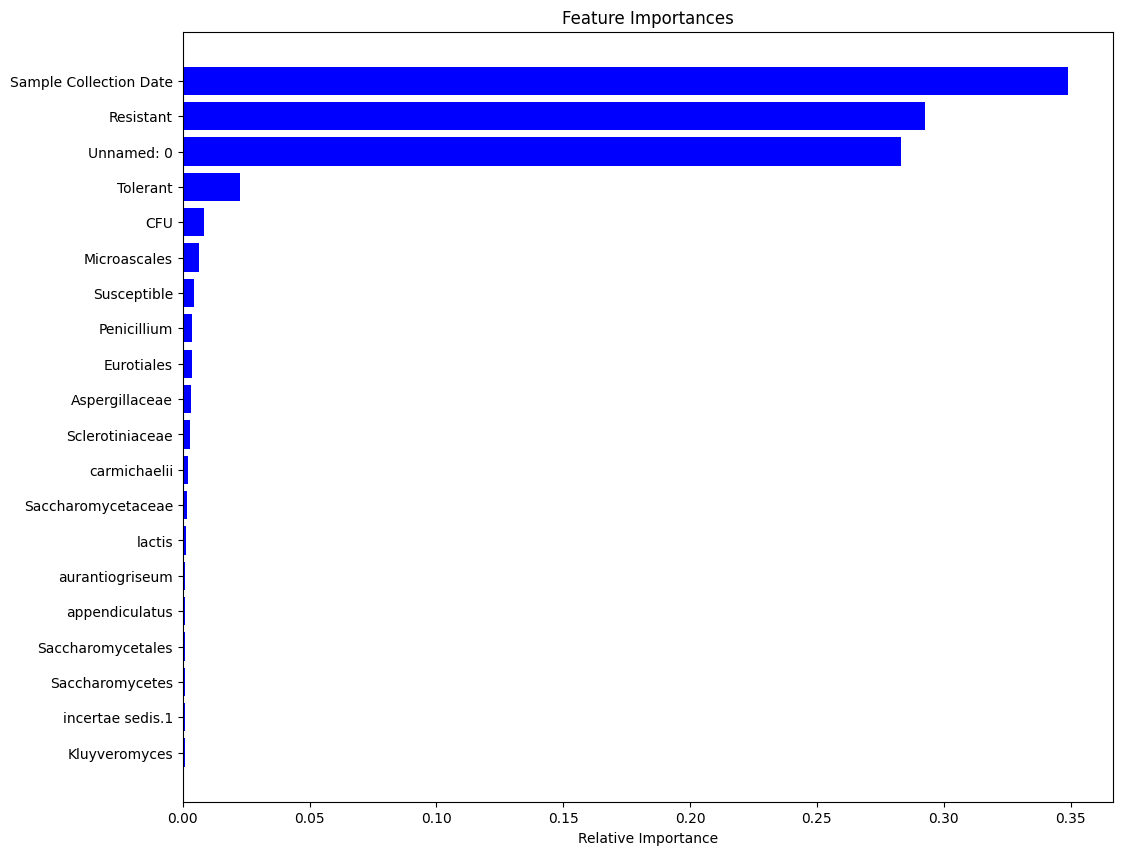

In [ ]:
feature_importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[-20:]  # top 20 features

plt.figure(figsize=(12, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Cross validation scores
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(scores)

# varying negative and positive values show that the model performance is inconsistent

[-0.41737171 -1.65194306 -0.10501314  0.48136148 -2.77240948]


In [ ]:

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [10, 20, 30]
# }
# grid_search = GridSearchCV(rf_model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)



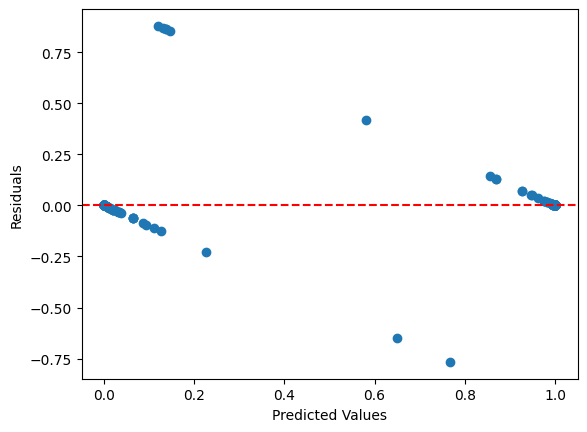

In [ ]:
residuals = y_test - y_rf_pred

plt.scatter(y_rf_pred, residuals)
plt.axhline(y = 0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



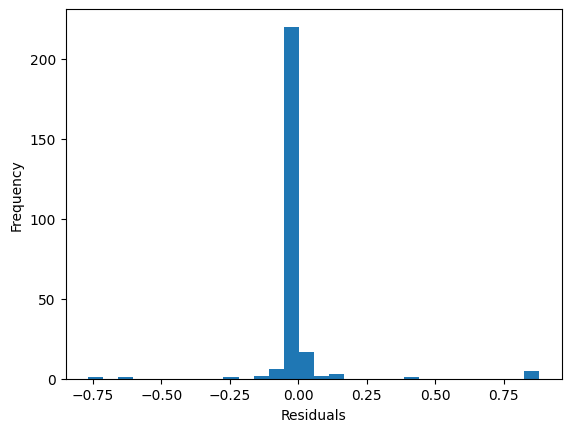

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()